In [10]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [11]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

In [12]:
from PIL import Image
import cv2

In [13]:
from tensorflow.keras.preprocessing.image import img_to_array,array_to_img

In [14]:
numbers_df = pd.read_csv('/content/drive/MyDrive/Handwritten_alpha_num_dataset/numbers_df.csv')

In [15]:
from google.colab.patches import cv2_imshow

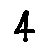

In [16]:
img = numbers_df.iloc[1][:-1].values.reshape(50,50)
cv2_imshow(img)

In [17]:
targets = numbers_df['label']
numbers_df.drop('label', axis=1, inplace=True)

In [18]:
targets = pd.get_dummies(targets)

In [19]:
num_classes = targets.shape[1]

In [ ]:
train_df = numbers_df.values
train_df.shape, targets.shape

((550, 2500), (550, 10))

In [ ]:
train_df = 255 - train_df
train_df = train_df / 255
train_df = train_df.reshape(550, 50, 50, 1)

In [ ]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Flatten, BatchNormalization, ZeroPadding2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

In [ ]:
!nvidia-smi

Sun Jul 10 14:17:58 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   37C    P8     9W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
model = Sequential()


model.add(ZeroPadding2D((1,1), input_shape=(50,50,1)))
model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))



model.add(ZeroPadding2D((1,1)))
model.add(Conv2D(256, kernel_size=(3,3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Conv2D(256, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))


model.add(Flatten())

model.add(Dense(128, activation='relu'))

model.add(Dropout(0.5))

model.add(Dense(num_classes, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 zero_padding2d_8 (ZeroPaddi  (None, 52, 52, 1)        0         
 ng2D)                                                           
                                                                 
 conv2d_8 (Conv2D)           (None, 50, 50, 64)        640       
                                                                 
 zero_padding2d_9 (ZeroPaddi  (None, 52, 52, 64)       0         
 ng2D)                                                           
                                                                 
 conv2d_9 (Conv2D)           (None, 50, 50, 64)        36928     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 25, 25, 64)       0         
 2D)                                                             
                                                      

In [ ]:
model.fit(train_df, targets, validation_split=0.2, epochs=50, batch_size=8)

Epoch 1/50
55/55 [==============================] - 2s 16ms/step - loss: 2.3048 - accuracy: 0.1341 - val_loss: 2.2880 - val_accuracy: 0.2364
Epoch 2/50
55/55 [==============================] - 1s 11ms/step - loss: 2.0872 - accuracy: 0.2591 - val_loss: 1.7507 - val_accuracy: 0.5000
Epoch 3/50
55/55 [==============================] - 1s 11ms/step - loss: 1.3534 - accuracy: 0.5636 - val_loss: 1.0551 - val_accuracy: 0.7000
Epoch 4/50
55/55 [==============================] - 1s 11ms/step - loss: 0.8992 - accuracy: 0.6955 - val_loss: 1.1840 - val_accuracy: 0.6455
Epoch 5/50
55/55 [==============================] - 1s 11ms/step - loss: 0.6824 - accuracy: 0.7727 - val_loss: 0.7267 - val_accuracy: 0.7818
Epoch 6/50
55/55 [==============================] - 1s 11ms/step - loss: 0.5681 - accuracy: 0.8250 - val_loss: 0.6716 - val_accuracy: 0.8273
Epoch 7/50
55/55 [==============================] - 1s 11ms/step - loss: 0.3933 - accuracy: 0.8614 - val_loss: 0.6645 - val_accuracy: 0.8182
Epoch 8/50
55

In [ ]:
model.save('/content/drive/MyDrive/Handwritten_alpha_num_dataset/num_cnn_14_6.h5')

In [ ]:
from tensorflow.keras.models import load_model
num_model = load_model('/content/drive/MyDrive/Handwritten_alpha_num_dataset/num_cnn_14_6.h5')

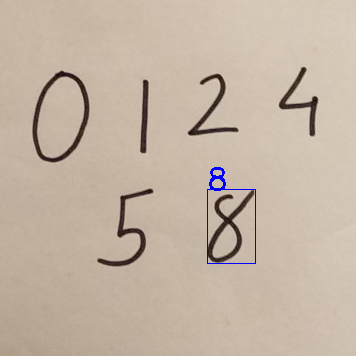

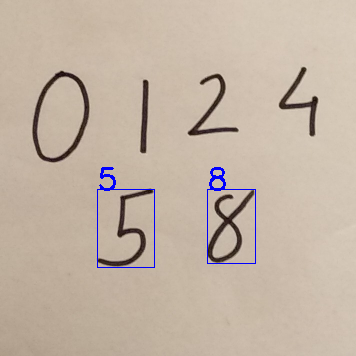

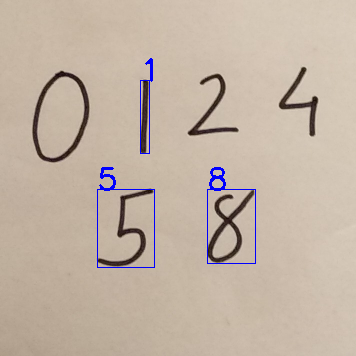

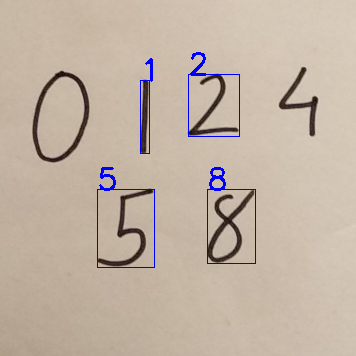

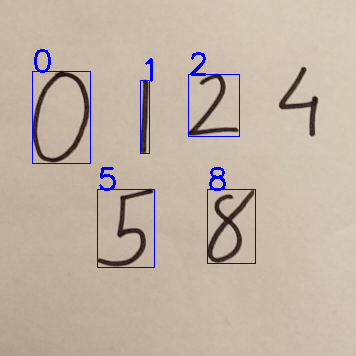

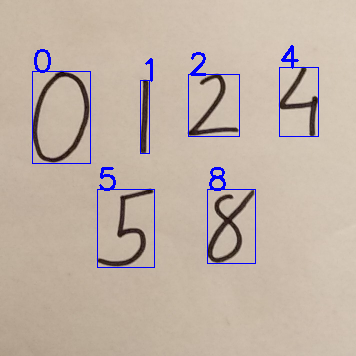

In [ ]:
image = cv2.imread('/content/drive/MyDrive/Handwritten_alpha_num_dataset//content/drive/MyDrive/Handwritten_alpha_num_dataset/IMG_20220710_182313~3.jpg.jpg')
image1 =  cv2.resize(image, None, fx=0.25, fy=0.25)
image_gray = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)
blurred = cv2.GaussianBlur(image1, (3,3), 2)
canny = cv2.Canny(blurred, 30,100)
contours, hierachy = cv2.findContours(canny, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
cv2.drawContours(blurred, contours, -1, (25,255,0), 1)

for c in contours:
    (x, y, w, h) = cv2.boundingRect(c)
    
    if w>=5 and h>=10:
        roi = image_gray[y:y+h, x:x+w]

        ret, roi = cv2.threshold(roi, 127, 255, cv2.THRESH_BINARY_INV)

        roi = cv2.copyMakeBorder(roi, 30, 30, 30, 30, cv2.BORDER_CONSTANT, value=(0,0,0))

        roi1 = cv2.resize(roi, (50,50), cv2.INTER_AREA)

        roi1 = roi1.reshape(1, 50, 50, 1)
        

        predict_x=num_model.predict(roi1) 
        res = (predict_x > 0.5).astype('int32')
        res1 = list(res.flatten())
        cv2.rectangle(image1, (x,y), (x+h, y+w), (255,0,0), 1)
        cv2.putText(image1, str(res1.index(1)), (x, y), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,0,0), 2)

    cv2_imshow(image1)

cv2.destroyAllWindows()